# Using the Matrix Inverse Method

In this recipe, we will use TensorFlow to solve two dimensional linear regressions with the matrix inverse method.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ops.reset_default_graph()
sess = tf.Session()

### Generating data

In [5]:
DATA_SIZE = 350
x_vals = np.linspace(8, 20, DATA_SIZE)
y_vals = 2.4 * x_vals + np.random.normal(loc=-1.3, scale=1, size=DATA_SIZE)

print(x_vals[: 4])
print(y_vals[: 4])

[ 8.          8.03438395  8.06876791  8.10315186]
[ 14.05139779  18.03182574  19.47293661  19.20033675]


### Plotting data

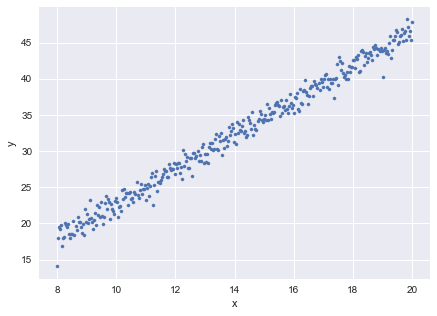

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(x_vals, y_vals, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Creating matrices

In [7]:
ones = np.ones(shape=[DATA_SIZE, 1])
A_vals = np.column_stack((np.reshape(x_vals, newshape=[-1, 1]), ones))
B_vals = np.reshape(y_vals, newshape=[-1, 1])

print(A_vals.shape)
print(A_vals[: 4])

print(B_vals.shape)
print(B_vals[: 4])

(350, 2)
[[ 8.          1.        ]
 [ 8.03438395  1.        ]
 [ 8.06876791  1.        ]
 [ 8.10315186  1.        ]]
(350, 1)
[[ 14.05139779]
 [ 18.03182574]
 [ 19.47293661]
 [ 19.20033675]]


### Creating tensors

In [8]:
A = tf.constant(A_vals)
B = tf.constant(B_vals)

print(A)
print(B)

Tensor("Const:0", shape=(350, 2), dtype=float64)
Tensor("Const_1:0", shape=(350, 1), dtype=float64)


### Solving with matrix inverse method

$$ solution = \left(A' \times A \right)^{-1} \times A' \times B $$

In [17]:
def solve_matrix_inverse(A, B):
    At = tf.transpose(A)
    At_A = tf.matmul(tf.transpose(A), A)
    At_A_i = tf.matrix_inverse(At_A)
    At_A_i_At = tf.matmul(At_A_i, At)
    solution = tf.matmul(At_A_i_At, B)
    return solution

In [18]:
solution = solve_matrix_inverse(A, B)
print(solution)

Tensor("MatMul_8:0", shape=(2, 1), dtype=float64)


In [19]:
sol_res = sess.run(solution)
sol_res

array([[ 2.38805583],
       [-1.16539368]])

### Plotting results

In [11]:
res = tf.matmul(A, solution, name='res')
print(res)

Tensor("res:0", shape=(350, 1), dtype=float64)


In [12]:
res_vals = sess.run(res)

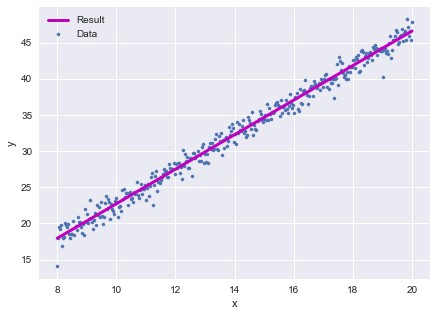

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(x_vals, y_vals, s=10, label='Data')
plt.plot(x_vals, res_vals, 'm-', linewidth=3, label='Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()